<a href="https://colab.research.google.com/github/smritisinha0801/EV-Market-Segmentation-Analysis/blob/main/EV_Market_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from yellowbrick.features.pca import PCADecomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
state_df=pd.read_csv('EV Maker by Place.csv')

In [ ]:
state_df.head(5)

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [ ]:
place_counts=state_df.groupby(['Place','State'])['EV Maker'].count().reset_index()
place_counts=place_counts.rename(columns={'EV Maker': 'EV_Maker_count'})
place_counts.head()


,Place,State,EV_Maker_count
0,Ahmedabad,Gujarat,1
1,Ahmednagar,Maharashtra,1
2,Akurdi,Maharashtra,1
3,Alwar,Rajasthan,1
4,Anantapur,Andhra Pradesh,1


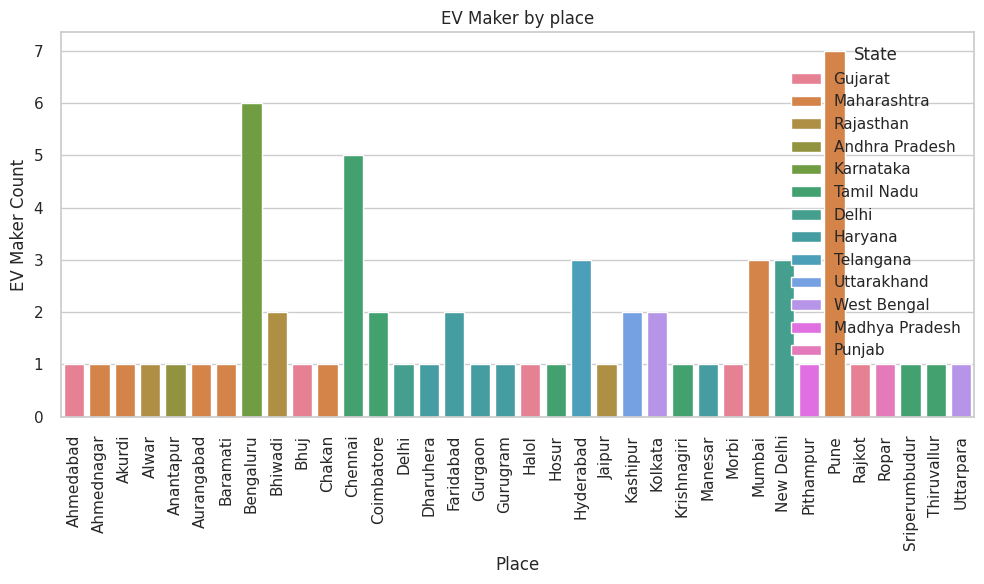

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=place_counts, x='Place', y='EV_Maker_count',hue='State')
plt.title('EV Maker by place')
plt.xticks(rotation=90)
plt.ylabel('EV Maker Count')
plt.xlabel('Place')
plt.tight_layout()
plt.show()

From above plot we can infer that Pune manufacture more number of EV Vehicles than any other city


In [ ]:
sanctioned_df=pd.read_csv('RS_Session_259_AU_2028_B.i.csv')

In [ ]:
sanctioned_df = sanctioned_df[sanctioned_df['State/UT'].str.lower() != 'total']

In [ ]:
sanctioned_df.head(10)

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [ ]:
state_chargers=sanctioned_df.groupby('State/UT')['No. of EV Chargers Sanctioned'].sum().reset_index()
state_chargers=state_chargers.sort_values(by='No. of EV Chargers Sanctioned', ascending=False)
top_state=state_chargers.iloc[0]
print(f"The state with the highest number of EV chargers sanctioned is {top_state['State/UT']} with {top_state['No. of EV Chargers Sanctioned']} chargers.")

The state with the highest number of EV chargers sanctioned is Maharashtra with 317 chargers.


/tmp/ipython-input-265-115094629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_chargers.head(10), x='State/UT', y='No. of EV Chargers Sanctioned', palette='viridis')


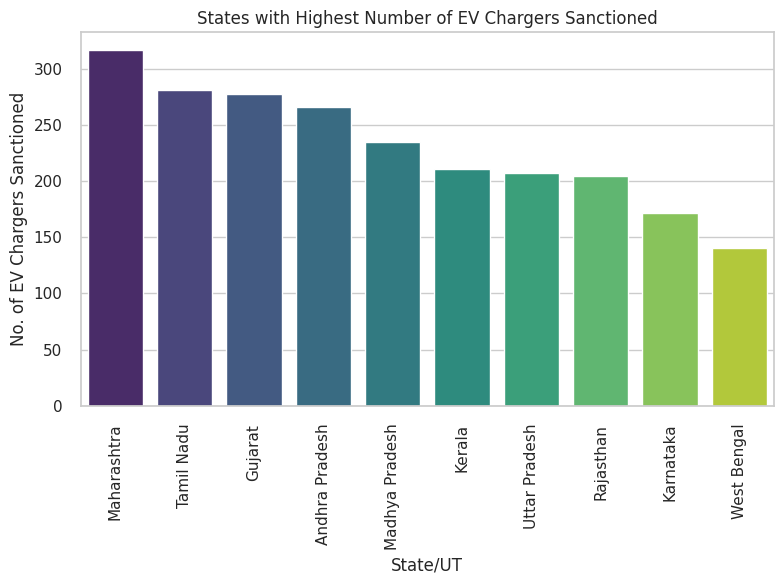

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=state_chargers.head(10), x='State/UT', y='No. of EV Chargers Sanctioned', palette='viridis')
plt.title('States with Highest Number of EV Chargers Sanctioned')
plt.xlabel('State/UT')
plt.ylabel('No. of EV Chargers Sanctioned')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

from this we can infer maharashtra have highest number of ev charging station sanctioned.


In [ ]:
location_df=pd.read_csv('ev-charging-stations-india.csv')

In [ ]:
location_df.head(5)

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [ ]:
maha_df=location_df[location_df['state'].str.lower()=='maharashtra']

In [ ]:
city_counts = maha_df['city'].value_counts().reset_index()
city_counts.columns = ['City', 'No_of_EV_Chargers']

In [ ]:
print(city_counts.head(10))


            City  No_of_EV_Chargers
0         Mumbai                 41
1           Pune                 34
2         Nashik                 15
3      bengaluru                 12
4         mumbai                  7
5         Nagpur                  6
6     Aurangabad                  6
7  Mahabaleshwar                  6
8    Navi Mumbai                  6
9          Thane                  4


In [ ]:
maha_df = location_df[location_df['state'].str.lower() == 'maharashtra']
grouped = maha_df.groupby('city')['name'].apply(list).reset_index()

# Step 3: Print the city and names of EV chargers
for _, row in grouped.iterrows():
    print(f"\nCity: {row['city']}")
    for name in row['name']:
        print(f"  - {name}")


City: Ahmednagar
  - Lilium Park, SH 44
  - Smile Stone Motels, Kamargaon
  - Smile Stone Motels, Kamargaon
  - Tata Power 

City: Amravati
  - Jadhav Solar & Automotives, Badnera

City: Amravati, MH
  - Jadhav Solar & Automotives, Badnera

City: Aurangabad
  - Satish Motors, Wanjarwadi
  - Click Hotel, Cidco
  - Dhoot Motors, Adalat Road
  - Satish Motors, Wanjarwadi
  - Click Hotel, Cidco
  - Aurangabad Smart City, Himayat Bagh

City: Baramati
  - Navagauri Tyres, MIDC

City: Belgavi
  - UK 27, The Fern

City: Bengaluru
  - HP PETROL PUMP - SAI PETROLEUM,MUMBAI
  - ShriSamarth DC Charging Station, Beed

City: Bhadalwadi
  - Hotel Shree Veg Solapur DC Charging Station

City: Buldhana
  - Hotel Parivar, Mehkar Buldhana

City: Butibori
  - IOCL - SUJIT AUTOMOBILES, Bangalore-Kanyakumari Road
  - IOCL - SUJIT AUTOMOBILES, Bangalore-Kanyakumari Road

City: Chakan
  - Sridha Motors, Chakan

City: Chouk
  - Tata Power 

City: Dahanu
  - MV EV DC Charging Station

City: Delhi
  - IOCL Hundr

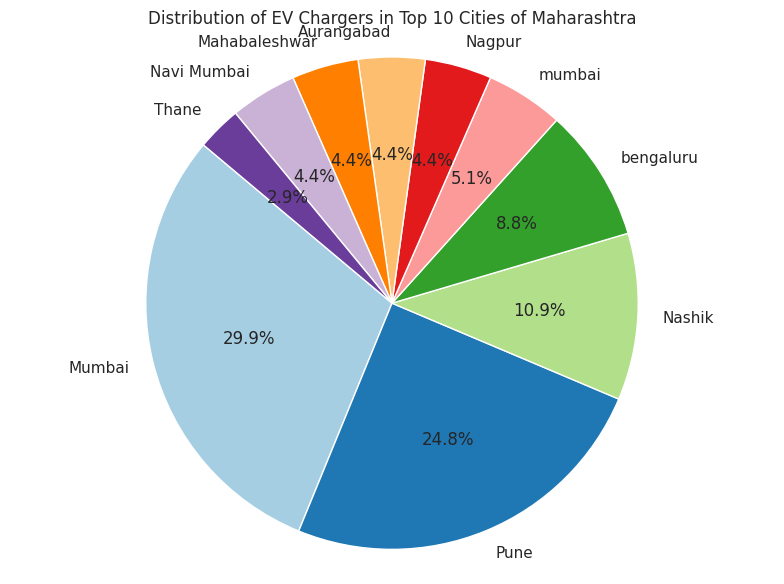

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(
    top10_cities['No_of_EV_Chargers'],
    labels=top10_cities['City'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title("Distribution of EV Chargers in Top 10 Cities of Maharashtra")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

In [ ]:
Car_df=pd.read_csv('Cars 1.csv')

In [ ]:
Car_df.head(10)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243
6,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Automatic Select Shift,17,Gasoline,26,Automatic transmission,2009 Audi A5 3.2 AT,Audi,2009 Audi A5,2009,265,243
7,201,221,191,All-wheel drive,Audi 4.2L 8 cylinder 350 hp 325 ft-lbs,True,6,6 Speed Automatic Select Shift,13,Gasoline,18,Automatic transmission,2009 Audi Q7 4.2,Audi,2009 Audi Q7,2009,350,325
8,201,221,191,All-wheel drive,Audi 3.6L 6 cylinder 280hp 266 ft-lbs,True,6,6 Speed Automatic Select Shift,14,Gasoline,20,Automatic transmission,2009 Audi Q7 3.6,Audi,2009 Audi Q7,2009,280,266
9,147,96,34,All-wheel drive,Audi 2.0L 4 cylinder 211 hp 258 ft-lbs Turbo,True,6,6 Speed Manual,22,Gasoline,30,Manual transmission,2009 Audi A4 Sedan 2.0 T Quattro,Audi,2009 Audi A4 Sedan,2009,211,258


<Axes: title={'center': 'EV (Hybrid) Cars Over the Years'}, xlabel='Identification.Year'>

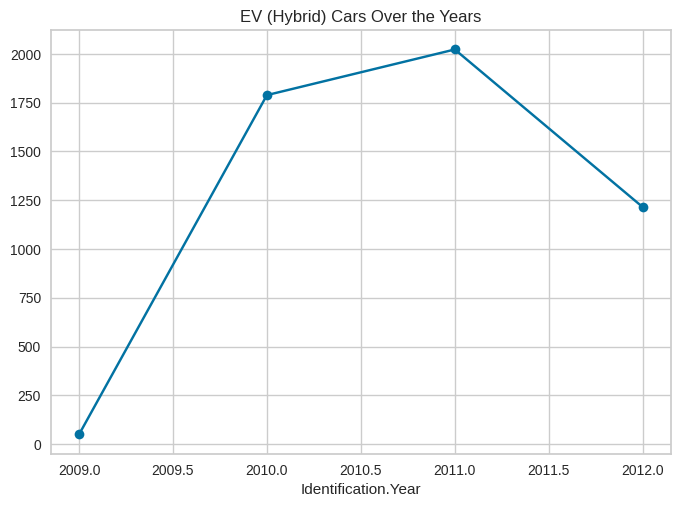

In [ ]:
ev_year_trend = Car_df.groupby('Identification.Year').size() # ev vehicles increased over years
ev_year_trend.plot(marker='o', title='EV (Hybrid) Cars Over the Years')

<Axes: title={'center': 'Fuel Types in EV (Hybrid) Cars'}, ylabel='count'>

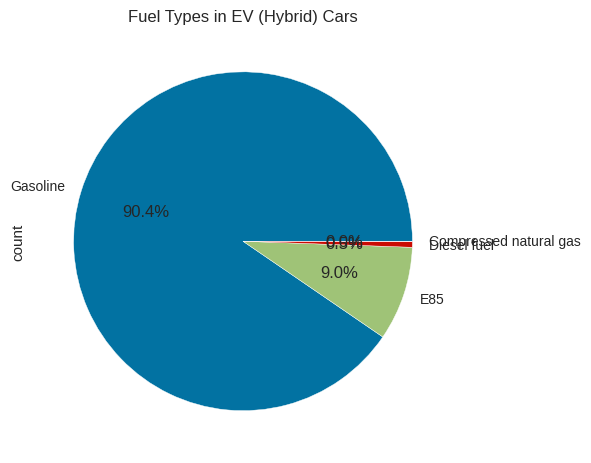

In [ ]:
Car_df['Fuel Information.Fuel Type'].value_counts().plot.pie( # ev fuel type
    autopct='%1.1f%%',
    title='Fuel Types in EV (Hybrid) Cars'
)

In [ ]:
ev_df=pd.read_csv('Electric Car.csv')

In [ ]:
ev_df.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

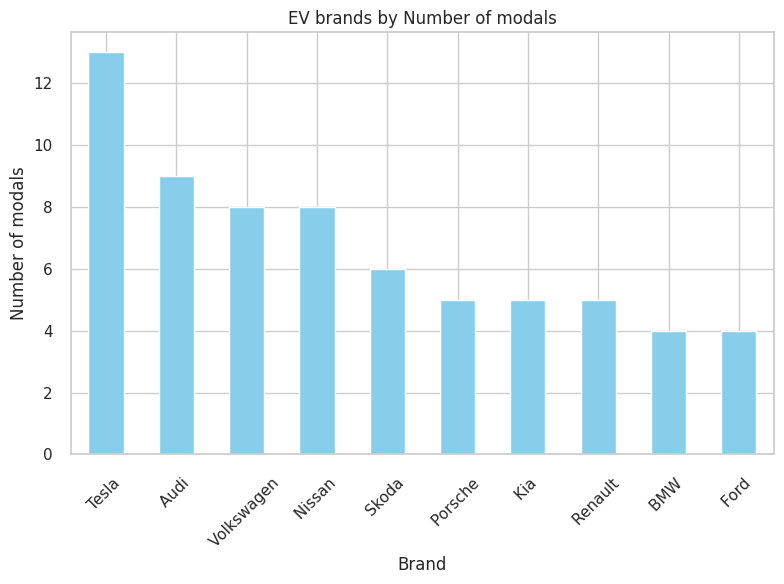

In [ ]:
brand_count=ev_df['Brand'].value_counts().head(10)
plt.figure()
brand_count.plot(kind='bar', color='skyblue')
plt.title('EV brands by Number of modals')
plt.xlabel('Brand')
plt.ylabel("Number of modals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

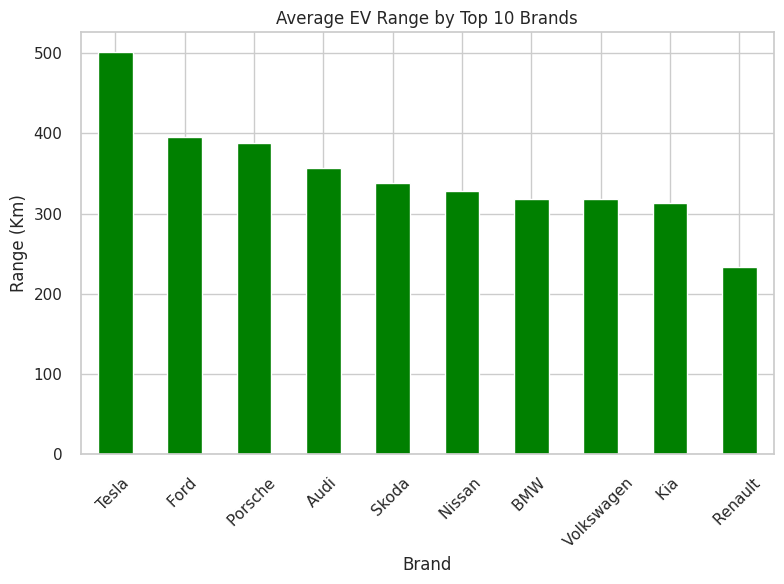

In [ ]:
top_brands = ev_df['Brand'].value_counts().head(10).index
avg_range = ev_df[ev_df['Brand'].isin(top_brands)].groupby('Brand')['Range_Km'].mean().sort_values(ascending=False)
plt.figure()
avg_range.plot(kind='bar', color='green')
plt.title("Average EV Range by Top 10 Brands")
plt.ylabel("Range (Km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

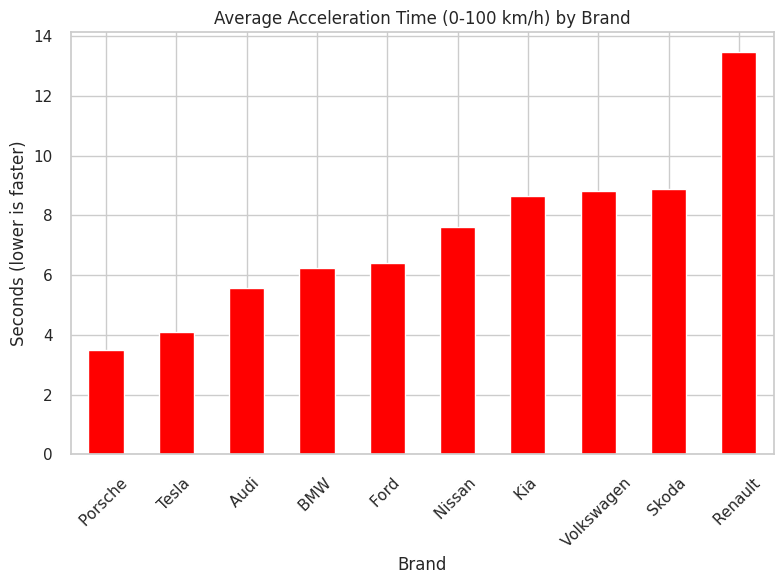

In [ ]:
fastest_brands = ev_df[ev_df['Brand'].isin(top_brands)].groupby('Brand')['AccelSec'].mean().sort_values()
plt.figure()
fastest_brands.plot(kind='bar', color='red')
plt.title("Average Acceleration Time (0-100 km/h) by Brand")
plt.ylabel("Seconds (lower is faster)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

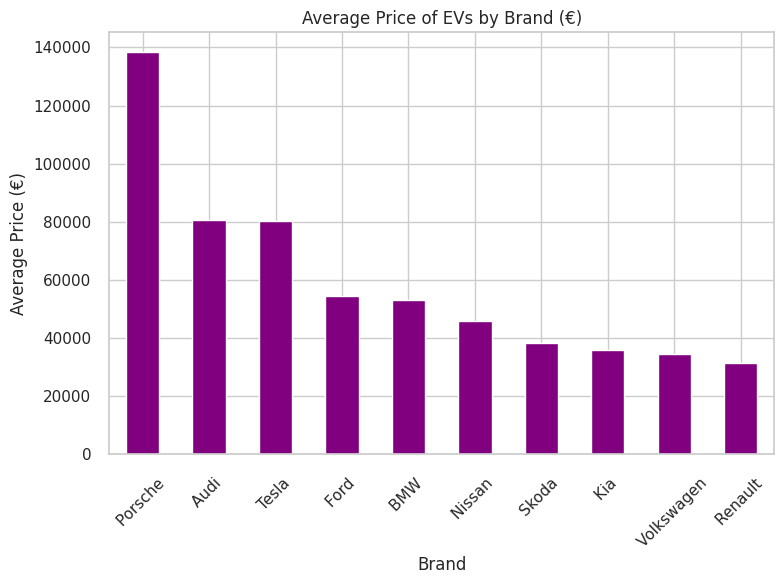

In [ ]:
avg_price = ev_df[ev_df['Brand'].isin(top_brands)].groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False)
plt.figure()
avg_price.plot(kind='bar', color='purple')
plt.title("Average Price of EVs by Brand (€)")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Top EV Brands by Number of Models
BMW, Volkswagen, and Mercedes have the highest number of EV models listed.

These brands are highly active in the EV space.
2. Average Range (Top Brands)
Tesla offers the longest average driving range, followed by Hyundai and Kia.

These brands are ideal for long-distance EV travel.

3.Fastest Accelerating EV Brands
Tesla has the lowest average acceleration time — meaning fastest performance.

Porsche and Audi also perform well in terms of speed.
5. Average Price by Brand
Porsche, Tesla, and Mercedes are at the high end of the EV market.

Renault, Peugeot, and Mini are in the affordable range.



In [ ]:
behaviour_df=pd.read_csv('Indian automoble buying behavour study 1.0.csv')

In [ ]:
behaviour_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
behaviour_df['Make'].unique()

array(['i20', 'Ciaz', 'Duster', 'City', 'SUV', 'Baleno', 'Verna',
       'Luxuray', 'Creata'], dtype=object)

In [ ]:
ev_models =['SUV', 'Creata', 'Luxuray']
behaviour_df['Is_EV']=behaviour_df['Make'].isin(ev_models)

In [ ]:
ev_buyers = behaviour_df[behaviour_df['Is_EV']]

/tmp/ipython-input-253-999232702.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='Set2')


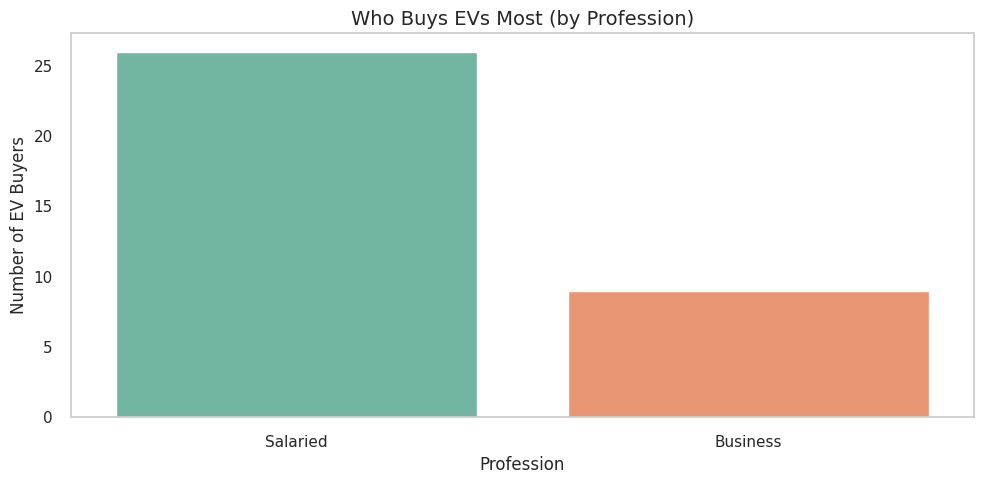

Average Total Salary of EV Buyers (by Profession) 
Business: ₹2,877,778
Salaried: ₹3,380,769


In [ ]:
profession_counts = ev_buyers['Profession'].value_counts()
average_salary_by_profession = ev_buyers.groupby('Profession')['Total Salary'].mean()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette='Set2')
plt.title('Who Buys EVs Most (by Profession)', fontsize=14)
plt.xlabel('Profession')
plt.ylabel('Number of EV Buyers')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print average total salary by profession
print("Average Total Salary of EV Buyers (by Profession) ")
for prof, salary in average_salary_by_profession.items():
    print(f"{prof}: ₹{salary:,.0f}")

In [ ]:
profession_counts = ev_buyers['Profession'].value_counts()
print(profession_counts)

Profession
Salaried    26
Business     9
Name: count, dtype: int64


In [ ]:
brand_counts = ev_buyers['Make'].value_counts()
print(brand_counts)

Make
SUV        19
Creata     14
Luxuray     2
Name: count, dtype: int64


In [ ]:
avg_buyer_salary = ev_buyers['Salary'].mean()
avg_wife_salary = ev_buyers['Wife Salary'].mean()
avg_total_salary = ev_buyers['Total Salary'].mean()
print(f"Average buyer salary: {avg_buyer_salary}")
print(f"Average wife salary: {avg_wife_salary}")
print(f"Average total salary: {avg_total_salary}")

Average buyer salary: 2214285.714285714
Average wife salary: 1037142.8571428572
Average total salary: 3251428.5714285714


Market Segementation Analysis of 4 Wheeler

In [ ]:
reviews_df=pd.read_csv('4-wheeler-EV-carwale.csv')
reviews_df.head(5)

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [ ]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in reviews_df['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)

reviews_df['sentiment'] = sentiments_list
reviews_df['sentiment'].value_counts()

,count
sentiment,
positive,114
negative,13
neutral,2


In [ ]:
reviews_df.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name,sentiment
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona,positive
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona,negative
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona,positive
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona,positive
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona,positive


In [ ]:
ratings_df = reviews_df[['Comfort','Performance','Fuel Economy','Value for Money','rating']]
ratings_df.head()

,Comfort,Performance,Fuel Economy,Value for Money,rating
0,4.0,5.0,5.0,5.0,5.0
1,1.0,1.0,1.0,1.0,0.0
2,5.0,5.0,5.0,4.0,5.0
3,5.0,5.0,5.0,5.0,5.0
4,4.0,5.0,3.0,2.0,3.0


In [ ]:
rating_feature = ['Comfort','Performance','Fuel Economy','Value for Money','rating']
for feature in rating_feature:
    ratings_df[feature] = np.where(ratings_df[feature] > 3,1,0)

ratings_df.mean().round(2)

/tmp/ipython-input-272-3451744514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df[feature] = np.where(ratings_df[feature] > 3,1,0)


,0
Comfort,0.88
Performance,0.85
Fuel Economy,0.85
Value for Money,0.76
rating,0.84


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
scaler=StandardScaler()
scaler.fit(ratings_df)
scaled_data=scaler.transform(ratings_df)

In [ ]:
pca=PCA(n_components=5).fit(scaled_data)
transformed_df=pca.transform(scaled_data)
PCA_df=pd.DataFrame(data=transformed_df,columns=ratings_df.columns)
print(PCA_df.head())

    Comfort  Performance  Fuel Economy  Value for Money    rating
0  0.983917    -0.025953      0.117420        -0.029168 -0.058787
1 -5.172105    -0.397218      0.535301        -0.098636 -0.219106
2  0.983917    -0.025953      0.117420        -0.029168 -0.058787
3  0.983917    -0.025953      0.117420        -0.029168 -0.058787
4 -2.555386    -0.135118     -2.264070         0.332104 -1.711877


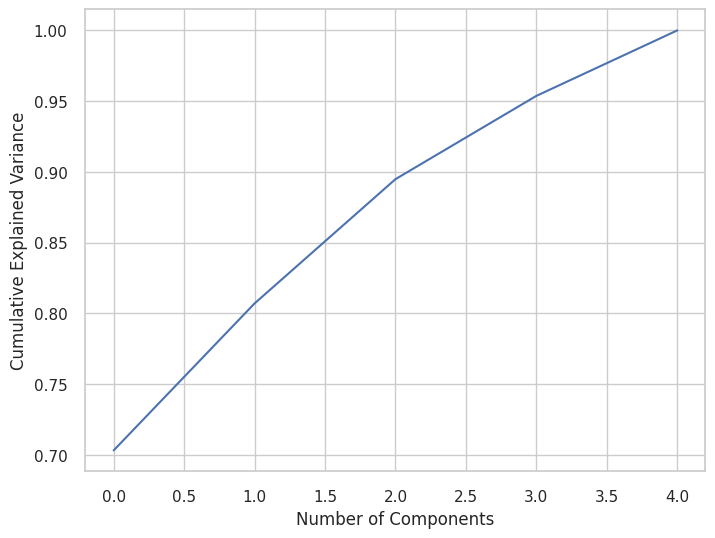

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
des_df=PCA_df.describe().loc['std']
pca_frame=pd.DataFrame({'std':des_df})
sd = pca_frame['std']
pca_frame['variance'] = [(std_dev**2)/sum(np.square(sd)) for std_dev in sd]
pca_frame['Cumulative_Proportion'] = np.cumsum(pca_frame['variance'])
pca_frame.head()

,std,variance,Cumulative_Proportion
Comfort,1.882497,0.703264,0.703264
Performance,0.723345,0.103834,0.807099
Fuel Economy,0.665173,0.087805,0.894904
Value for Money,0.544488,0.058834,0.953738
rating,0.482824,0.046262,1.000000


In [ ]:
pca_df = pd.DataFrame(pca.components_.round(3),columns=ratings_df.columns)
pca_df

,Comfort,Performance,Fuel Economy,Value for Money,rating
0,0.439,0.456,0.429,0.451,0.461
1,0.399,-0.336,0.674,-0.193,-0.486
2,-0.605,-0.342,0.349,0.629,-0.027
3,-0.492,0.682,0.368,-0.317,-0.238
4,-0.201,-0.312,0.323,-0.513,0.703


In [ ]:
X = []
for feature in pca_df.columns:
    X.append(np.array(pca_df[feature]).reshape(1, -1))

rows = []
col = list(pca_df.columns)

# Loop over each feature (PC1, PC2)
for j in range(len(col)):
    row_df = pd.DataFrame(X[j], columns=['PC{}'.format(i) for i in range(1, len(X[j][0]) + 1)])
    row_df[''] = col[j]  # Assign feature name as label
    rows.append(row_df)

# Concatenate all rows
PC_df = pd.concat(rows, ignore_index=True)

# Set feature names as index
PC_df.set_index('', inplace=True)

# Print final DataFrame
print(PC_df)


                   PC1    PC2    PC3    PC4    PC5
                                                  
Comfort          0.439  0.399 -0.605 -0.492 -0.201
Performance      0.456 -0.336 -0.342  0.682 -0.312
Fuel Economy     0.429  0.674  0.349  0.368  0.323
Value for Money  0.451 -0.193  0.629 -0.317 -0.513
rating           0.461 -0.486 -0.027 -0.238  0.703


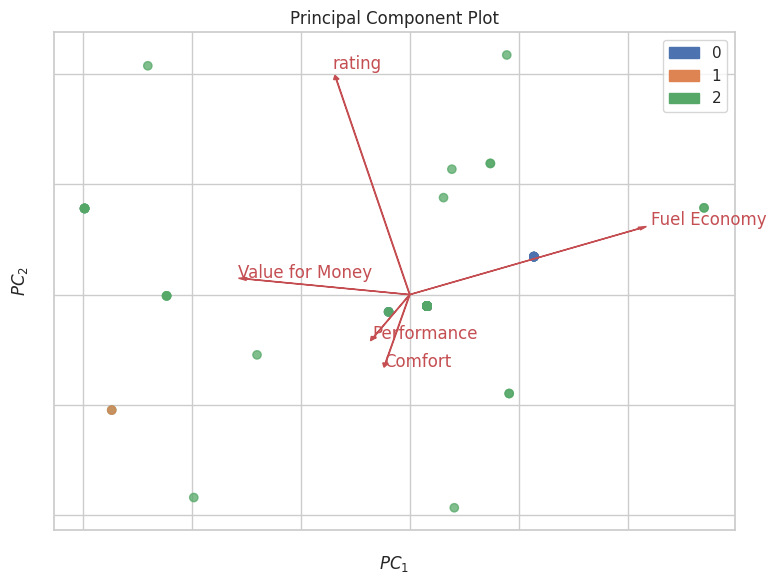

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [ ]:
le = LabelEncoder()
col = le.fit_transform(reviews_df['sentiment'])
PCA_df['sentiment'] = col
X = PCA_df.drop(columns = 'sentiment')
y = PCA_df['sentiment']
visualizer = PCADecomposition(scale=True, proj_features = True, color = 'black')
visualizer.fit_transform(X, y)
visualizer.show()

Extracting Segments

Text(0, 0.5, 'Sum of Within Cluster Distances')

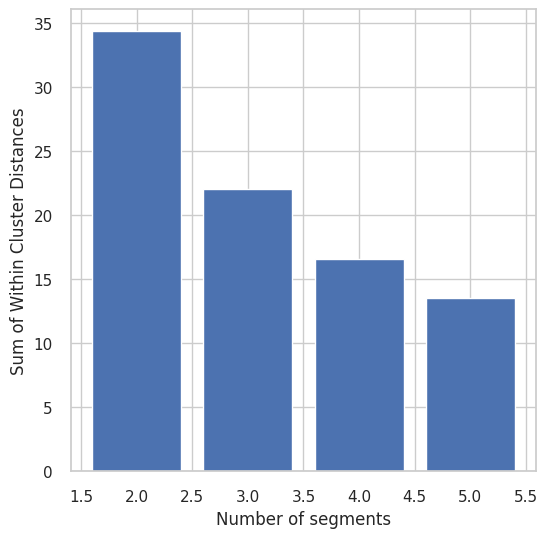

In [ ]:
k_range = range(2, 6)
inertias = []
k_result = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=7, random_state=0)
    model.fit(ratings_df)
    labels = model.predict(ratings_df)
    inertias.append(model.inertia_)
    k_result.append(labels)

plt.figure(figsize=(6,6))
plt.bar(range(2, 6), inertias)
plt.xlabel('Number of segments')
plt.ylabel('Sum of Within Cluster Distances')

/tmp/ipython-input-287-4262110686.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ari_scores, labels=range(2, 6))


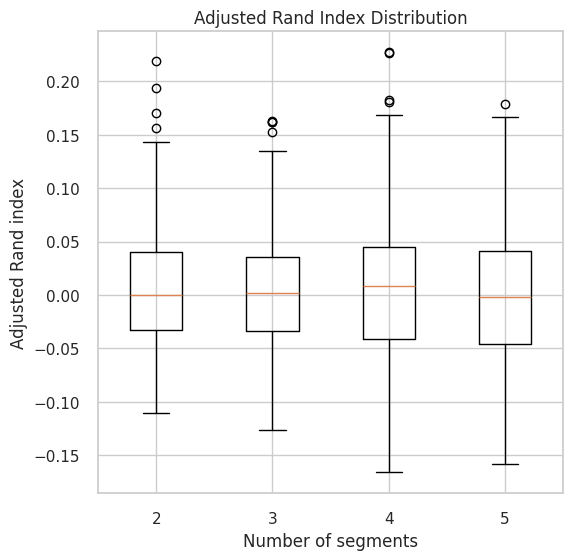

In [ ]:
n_boot = 100*2
plt.figure(figsize = (6,6))
ari_scores = []
for labels in k_result:
    ari_lis = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ARI = adjusted_rand_score(labels, random_sample)
        ari_lis.append(ARI)
    ari_scores.append(ari_lis)

plt.boxplot(ari_scores, labels=range(2, 6))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

In [ ]:
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(ratings_df)
label4 = model.predict(ratings_df)
label4

array([0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 3, 0, 0, 0, 3],
      dtype=int32)

Profiling Segments


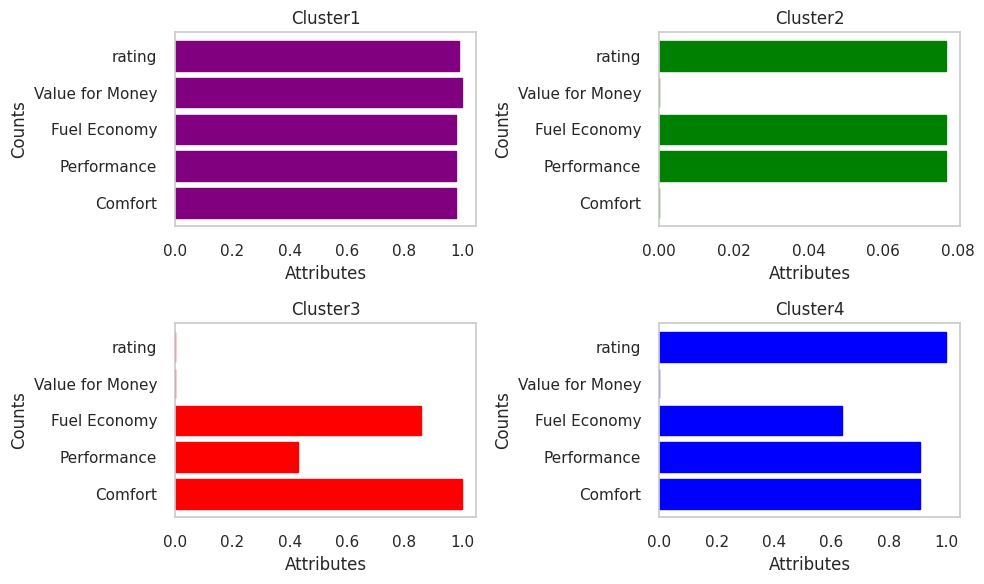

In [ ]:
df_copy = ratings_df.copy()
df_copy['segments'] = label4

cluster_dict = {
    'Columns': ratings_df.columns,
    'Cluster1': np.array(np.zeros(6)),
    'Cluster2': np.array(np.zeros(6)),
    'Cluster3': np.array(np.zeros(6)),
    'Cluster4': np.array(np.zeros(6))
}


segment_counts = df_copy["segments"].value_counts().sort_index()
for i, value in enumerate(segment_counts):
    temp = df_copy[df_copy['segments'] == i].drop(columns="segments")
    temp = temp.sum()/value
    cluster_dict["Cluster{}".format(i+1)] = temp.values

profile_plot_data= pd.DataFrame(cluster_dict)

cluster_list = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

plt.figure(figsize=(10 ,6))
for idx, cluster in enumerate(cluster_list,1):
    k_range = [0,1,2,3,4]
    if idx==1:
        color="purple"
    elif idx==2:
        color="green"
    elif idx==3:
        color="red"
    else:
        color="blue"
    plt.subplot(2, 2, idx)
    bars = plt.barh(profile_plot_data['Columns'], profile_plot_data[cluster],edgecolor='black',facecolor='none')
    for i in k_range:
        bars[i].set_color(color)
    plt.grid(False)
    plt.xlabel('Attributes')
    plt.ylabel('Counts')
    plt.title(cluster)


plt.tight_layout()

plt.show()

Describing
segments

<Figure size 1200x800 with 0 Axes>

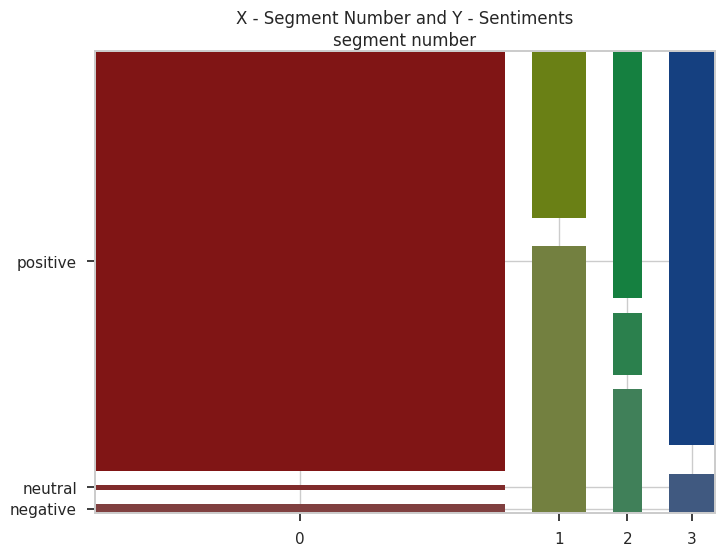

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
temp_col = reviews_df['sentiment'].replace({
    "Positive":1,
    "Nuetral":0,
    "Negative":-1
})

frame = pd.DataFrame({
    'segment': label4,
    'sentiment': temp_col
})

cross_tab = pd.crosstab(frame['segment'], frame['sentiment'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.05, labelizer=lambda k:"")

plt.xlabel('segment number')
plt.ylabel('Sentiments',rotation=90)
plt.title("X - Segment Number and Y - Sentiments")
plt.show()

Market Segmentation Analysis of 2 Wheeler

In [ ]:
data_tw=pd.read_csv('ev2_bikewale.csv')
data_model=pd.read_csv('ev_model_spec.csv')

In [ ]:
data=data_tw.merge(data_model, how= 'left', on= 'Model Name')

In [ ]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


In [ ]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)

data['sentiment'] = sentiments_list
data['sentiment'].value_counts()

,count
sentiment,
positive,527
negative,264
neutral,53


In [ ]:
data_segment = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money','sentiment']].copy()

In [ ]:
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


In [ ]:
data_segment = data.iloc[:, 5:13].copy()
data_segment = data_segment.fillna(0.)

In [ ]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [ ]:
data_segment.mean()

,0
Visual Appeal,3.309242
Reliability,2.811611
Performance,1.441943
Service Experience,2.619668
Extra Features,0.643365
Comfort,2.300948
Maintenance cost,0.723934
Value for Money,1.562796


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)
pca = PCA(random_state = 5)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.291227,-1.038055,0.354864,0.623469,1.102720,0.169287,0.438012,-0.957827
1,-0.710801,-1.394405,-0.360466,0.621671,-0.320899,0.086053,0.426279,0.149917
2,0.849149,-1.189765,0.167683,0.410898,0.409054,0.191904,0.329993,-0.830738
3,-1.967022,-0.878935,-0.100197,-0.330003,0.075822,-0.069599,-0.013068,-0.011328
4,-0.078940,-1.017161,-0.079210,0.324132,0.961554,-0.005517,0.107260,-0.427972


In [ ]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [ ]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,0.480170,0.117814,0.063320,0.730598,-0.247014,-0.105903,-0.375474,-0.067539
Reliability,0.494758,0.124910,-0.002776,-0.152447,0.819319,-0.060484,-0.117211,-0.166384
Performance,0.128721,0.459145,0.574833,0.005549,0.019902,0.025704,0.288468,0.598232
Service Experience,0.486499,0.100691,-0.054176,-0.653781,-0.470391,-0.052432,-0.311210,0.044129
Extra Features,0.024373,0.519633,-0.364578,0.023208,-0.116821,-0.559390,0.456829,-0.246323
Comfort,0.418255,-0.304266,0.249807,0.020111,-0.172621,0.296656,0.623271,-0.404238
Maintenance cost,-0.005912,0.513208,-0.386495,0.054822,-0.020302,0.762039,0.003360,-0.055435
Value for Money,0.309572,-0.351548,-0.563840,0.107598,0.046688,-0.009572,0.260855,0.617065


/tmp/ipython-input-304-2805702330.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
/tmp/ipython-input-304-2805702330.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')


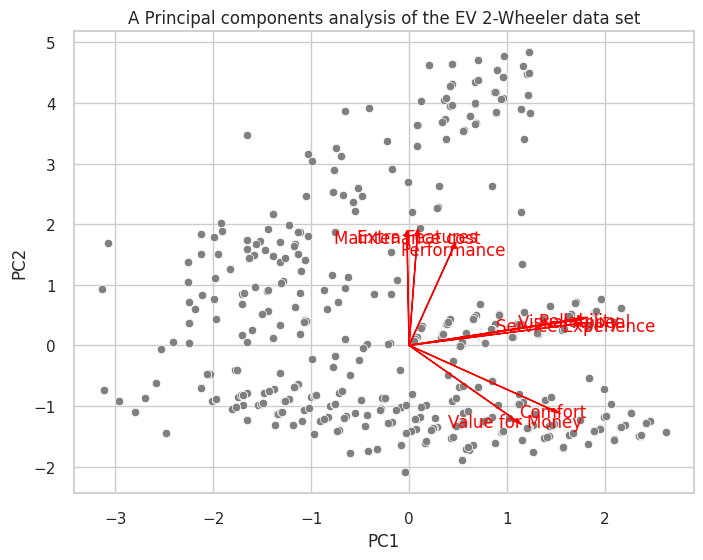

In [ ]:
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.show()


Text(0, 0.5, 'Sum of Within Cluster Distances')

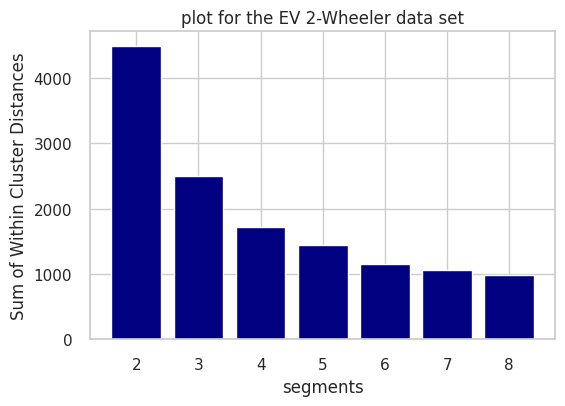

In [ ]:
from sklearn.cluster import KMeans
k_range = range(2, 9)
inertias = []
k_result = []
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_pca)
    labels = model.predict(df_pca)
    inertias.append(model.inertia_)
    k_result.append(labels)

plt.figure(figsize=(6,4))
plt.bar(list(k_range), inertias, color='navy')
#plt.bar(range(2, 9), inertias)
plt.title('plot for the EV 2-Wheeler data set')
plt.xlabel('segments')
plt.ylabel('Sum of Within Cluster Distances')

/tmp/ipython-input-307-368399620.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ari_scores, labels=range(2, 9))


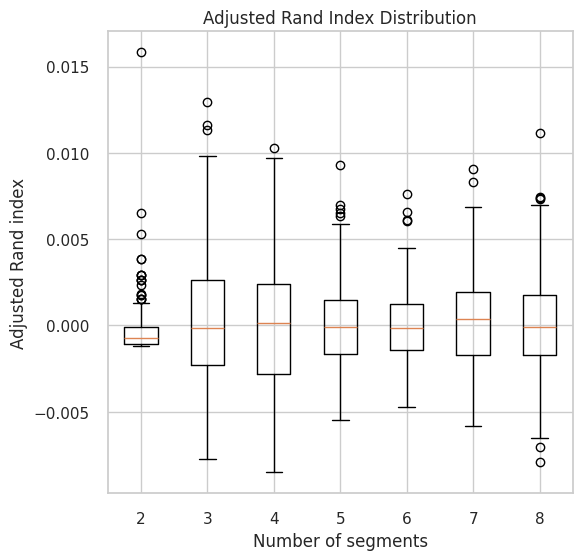

In [ ]:
n_boot = 100*2
plt.figure(figsize = (6,6))
ari_scores = []
for labels in k_result:
    ari_lis = []
    for _ in range(n_boot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ARI = adjusted_rand_score(labels, random_sample)
        ari_lis.append(ARI)
    ari_scores.append(ari_lis)

plt.boxplot(ari_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

In [ ]:
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(df_pca)
label4 = model.predict(df_pca)
label4

array([1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 3, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 3, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 1, 3,
       1, 3, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1,
       3, 1, 1, 3, 3, 0, 1, 3, 3, 3, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1,
       1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_pca)

KMeans(random_state=42)

In [ ]:
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

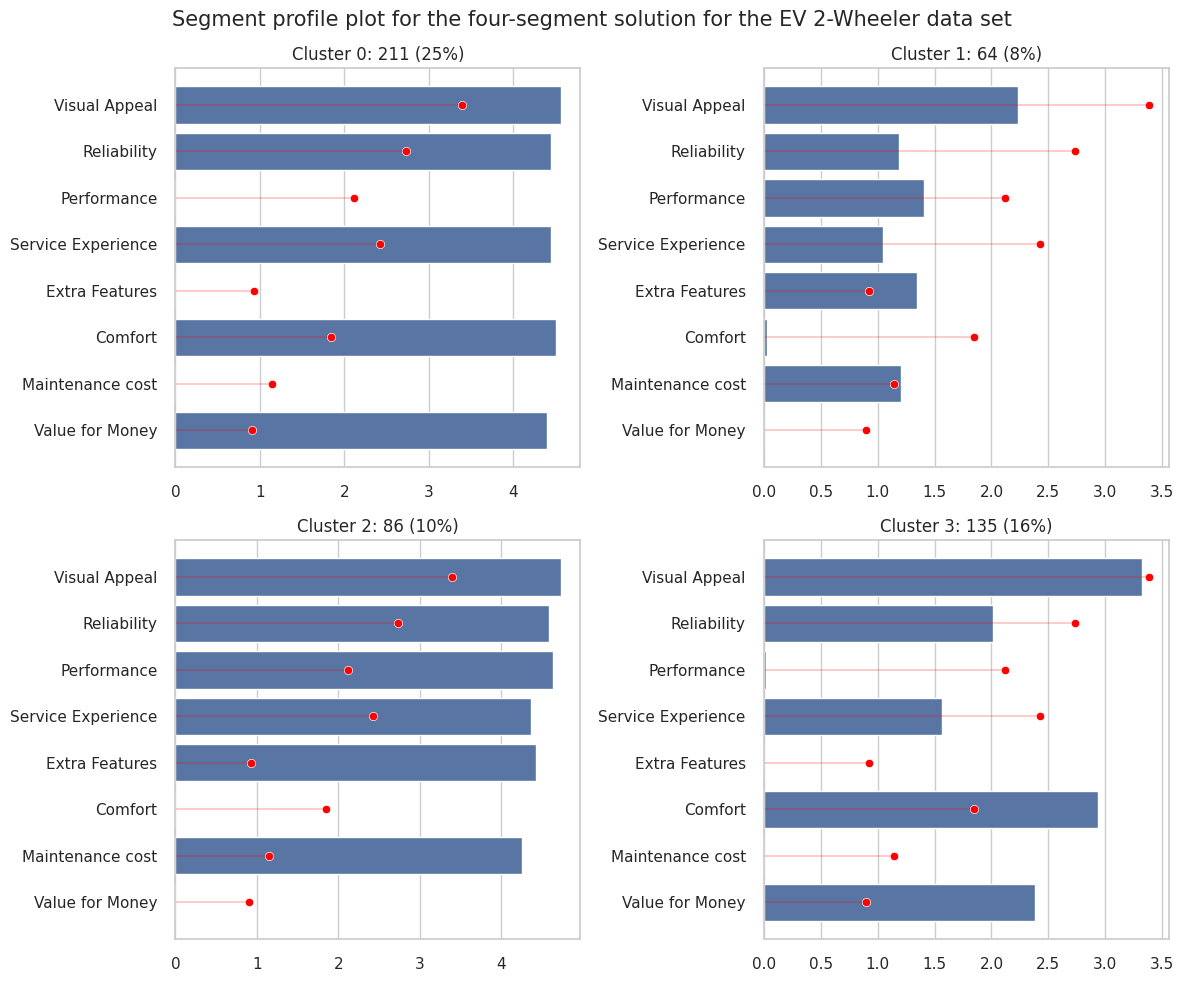

In [318]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']
plt.figure(figsize = (12, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

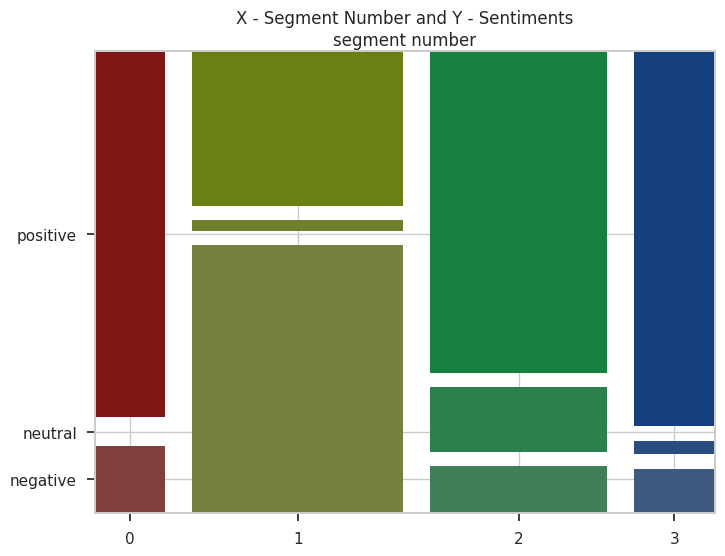

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
temp_col = data['sentiment'].replace({
    "Positive":1,
    "Nuetral":0,
    "Negative":-1
})

frame = pd.DataFrame({
    'segment': label4,
    'sentiment': temp_col
})

cross_tab = pd.crosstab(frame['segment'], frame['sentiment'])

plt.figure(figsize=(12, 8))
mosaic_data = cross_tab.stack()
mosaic(mosaic_data, axes_label=True, gap=0.05, labelizer=lambda k:"")

plt.xlabel('segment number')
plt.ylabel('Sentiments',rotation=90)
plt.title("X - Segment Number and Y - Sentiments")
plt.show()